# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
ideb = pd.read_csv('/content/drive/MyDrive/Sirius/Atividades_semana3/ideb.csv')

Mounted at /content/drive


In [3]:
# Selecionando as colunas da atividade
colunas_selecionadas = ['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']

# Criando um novo DataFrame com as colunas selecionadas
df = ideb[colunas_selecionadas]

In [4]:
df

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.80,165.60,2.3
1,2005,AC,49.3,151.80,149.60,1.8
2,2005,AC,48.8,163.60,155.80,1.9
3,2005,AC,48.8,159.00,153.39,1.9
4,2005,AC,74.7,138.00,134.19,2.3
...,...,...,...,...,...,...
294421,2019,SP,98.4,229.75,216.07,6.2
294422,2019,SP,92.9,305.85,296.39,6.2
294423,2019,SP,98.0,230.69,216.92,6.2
294424,2019,SP,98.0,230.69,216.92,6.2


In [ ]:
# seu código

In [ ]:
# seu código


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [5]:
# Filtrando os dados para considerar apenas o ano de 2019
dados_2019 = df[df['ano'] == 2019]

# Agrupando os dados por estado e calcular a média
df_agrupado = dados_2019.groupby('sigla_uf').mean().reset_index()

df_agrupado


,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125
5,CE,2019.0,94.930585,259.397187,254.290339,5.318929
6,DF,2019.0,89.700000,256.365000,252.218333,4.900000
7,ES,2019.0,91.419721,265.574820,255.552122,5.305036
8,GO,2019.0,95.783982,257.356514,251.849397,5.357471
9,MA,2019.0,90.548944,225.296995,223.669534,4.067158


### Atividade 3: Padronize os dados.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Selecionando apenas as colunas numéricas para padronização
colunas_numericas = ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']
dados_numericos = df_agrupado[colunas_numericas]

In [8]:
# Inicializar o StandardScaler
scaler = StandardScaler()

# Padronizando os dados
dados_padronizados = scaler.fit_transform(dados_numericos)

# Criando um novo DataFrame com os dados padronizados
dados_padronizados_df = pd.DataFrame(dados_padronizados, columns=colunas_numericas)

dados_padronizados_df

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,-0.025280,0.080727,-0.016434,0.092154
1,0.801179,-0.437122,-0.531887,-0.201424
2,-0.426168,-1.474271,-1.443233,-1.063297
3,-1.670713,-1.889188,-1.751891,-1.674063
4,-1.323101,-0.713999,-0.626401,-1.060175
5,1.470015,1.074488,1.259381,1.261788
6,0.242071,0.861442,1.097147,0.504679
7,0.645797,1.508539,1.358175,1.236680
8,1.670361,0.931107,1.068260,1.331443
9,0.441371,-1.321450,-1.138160,-1.000475


In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

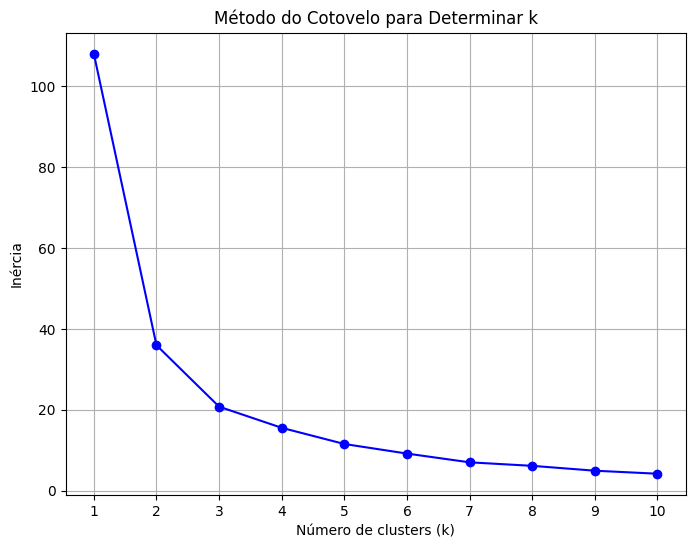

In [10]:
# Criano uma lista para armazenar valores de inércia
inercia = []

# Testando valores de k de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_padronizados_df)
    inercia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# seu código

In [ ]:
# seu código

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

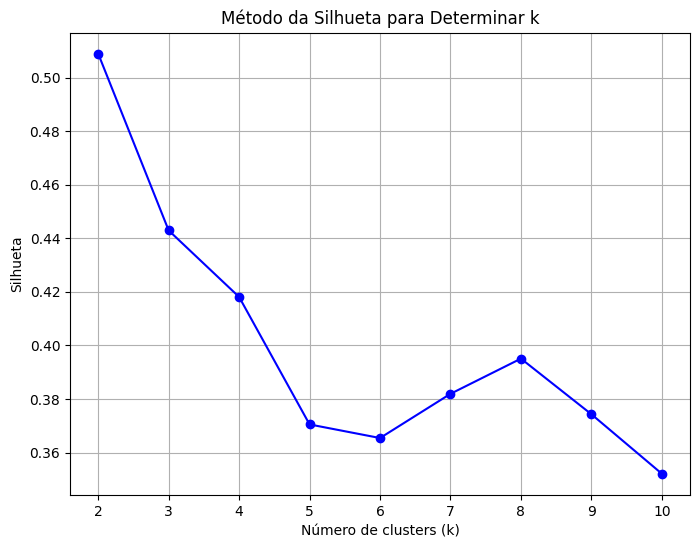

In [11]:
from sklearn.metrics import silhouette_score

# Criando lista para armazenar valores de silhueta
silhueta_vals = []

# Testando valores de k de 2 a 10 (é bom não começar com k=1, pois a silhueta requer pelo menos 2 clusters)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_padronizados_df)
    labels = kmeans.labels_
    silhueta = silhouette_score(dados_padronizados_df, labels)
    silhueta_vals.append(silhueta)

# Plotando o gráfico do método da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhueta_vals, marker='o', linestyle='-', color='b')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhueta')
plt.title('Método da Silhueta para Determinar k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

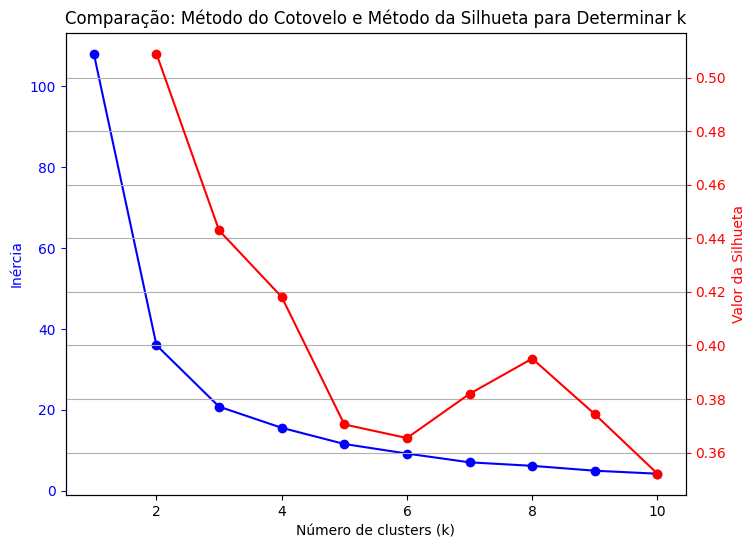

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Criando listas para armazenar valores de inércia e de silhueta
inercia = []
silhueta_vals = []

# Testando valores de k de 1 a 10 para inércia
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_padronizados_df)
    inercia.append(kmeans.inertia_)

# Testando valores de k de 2 a 10 para silhueta
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_padronizados_df)
    labels = kmeans.labels_
    silhueta = silhouette_score(dados_padronizados_df, labels)
    silhueta_vals.append(silhueta)

# Plotando o gráfico com duas linhas e dois eixos y
fig, ax1 = plt.subplots(figsize=(8, 6))

# Método do cotovelo
ax1.plot(range(1, 11), inercia, marker='o', linestyle='-', color='b', label='Inércia')
ax1.set_xlabel('Número de clusters (k)')
ax1.set_ylabel('Inércia', color='b')
ax1.tick_params('y', colors='b')

# Criando um segundo eixo y para o método da silhueta
ax2 = ax1.twinx()
ax2.plot(range(2, 11), silhueta_vals, marker='o', linestyle='-', color='r', label='Silhueta')
ax2.set_ylabel('Valor da Silhueta', color='r')
ax2.tick_params('y', colors='r')

plt.title('Comparação: Método do Cotovelo e Método da Silhueta para Determinar k')
plt.grid(True)
plt.show()


### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [35]:
from sklearn.cluster import KMeans

# Segundo o gráfico de silhueta, o número de k é 8
k_escolhido = 8

# Inicializando o K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=k_escolhido, random_state=42)

# Executando o algoritmo K-means nos dados padronizados
kmeans.fit(dados_padronizados_df)

# Adicionando as informações de cluster de volta aos dados originais
df_agrupado['Cluster'] = kmeans.labels_

# Mostrar informações sobre os clusters
df_agrupado


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,Cluster,PCA1,PCA2
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739,2,-0.691216,0.143019
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295,6,8.522098,-4.858692
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397,0,27.874691,-2.537391
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444,5,35.650560,1.671160
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125,3,13.639073,3.613183
5,CE,2019.0,94.930585,259.397187,254.290339,5.318929,1,-22.839484,-2.586691
6,DF,2019.0,89.700000,256.365000,252.218333,4.900000,4,-18.417475,2.043217
7,ES,2019.0,91.419721,265.574820,255.552122,5.305036,1,-27.666037,1.467260
8,GO,2019.0,95.783982,257.356514,251.849397,5.357471,1,-19.864557,-3.956013
9,MA,2019.0,90.548944,225.296995,223.669534,4.067158,0,23.130815,-5.400123


In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

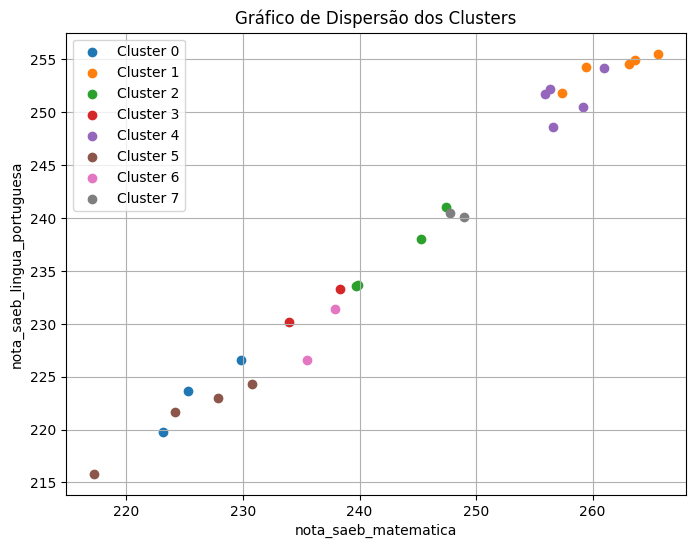

In [36]:
import matplotlib.pyplot as plt

# Escolhendo das colunas para o gráfico de dispersão (aqui pode ser qualquer uma que faça sentido)
coluna_x = 'nota_saeb_matematica'
coluna_y = 'nota_saeb_lingua_portuguesa'

# Plotagem dos clusters
plt.figure(figsize=(8, 6))

# Loop para cada cluster
for cluster_id in range(k_escolhido):  # k_escolhido é o número de clusters
    cluster = df_agrupado[df_agrupado['Cluster'] == cluster_id]
    plt.scatter(cluster[coluna_x], cluster[coluna_y], label=f'Cluster {cluster_id}')

# Adicionando legendas e rótulos
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.title('Gráfico de Dispersão dos Clusters')
plt.legend()
plt.grid(True)
plt.show()


### Atividade 8: Quais são os estados de cada grupo?

In [37]:
# Mostrando os estados em cada cluster
for cluster_id in range(k_escolhido):  # k_escolhido é o número de clusters
    estados_cluster = df_agrupado[df_agrupado['Cluster'] == cluster_id]['sigla_uf'].tolist()
    print(f"Cluster {cluster_id}: {estados_cluster}")


Cluster 0: ['AM', 'MA', 'RR']
Cluster 1: ['CE', 'ES', 'GO', 'PR', 'SP']
Cluster 2: ['AC', 'MS', 'MT', 'PI']
Cluster 3: ['BA', 'PB']
Cluster 4: ['DF', 'MG', 'RJ', 'RS', 'SC']
Cluster 5: ['AP', 'PA', 'RN', 'SE']
Cluster 6: ['AL', 'TO']
Cluster 7: ['PE', 'RO']


In [ ]:
# seu código

In [ ]:
# seu código

### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

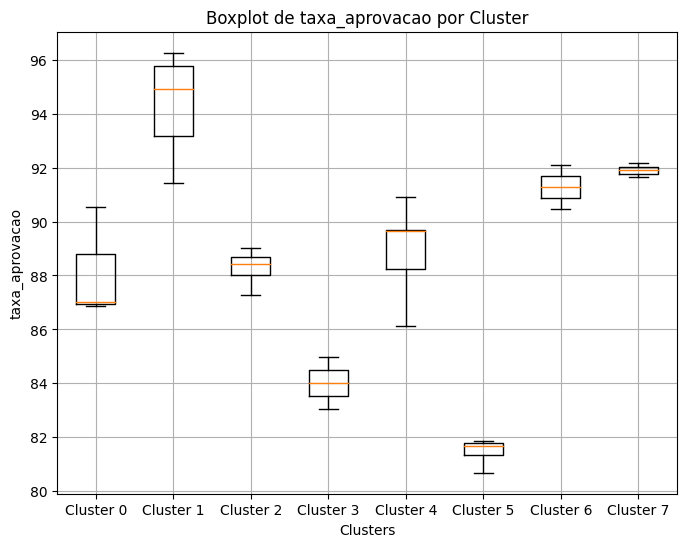

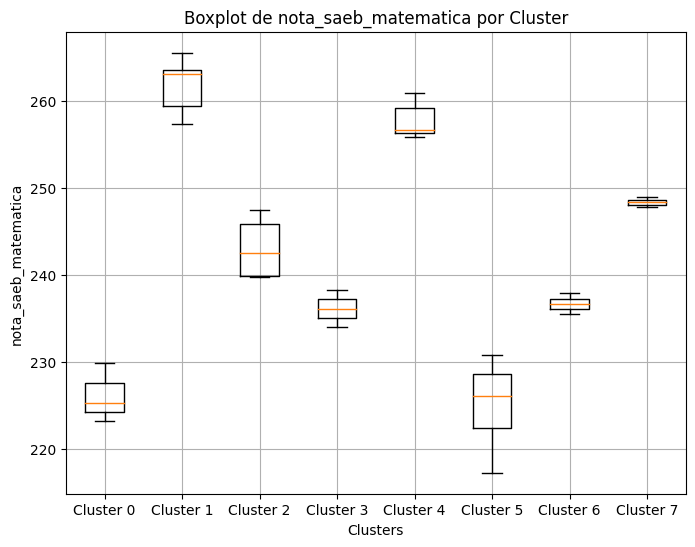

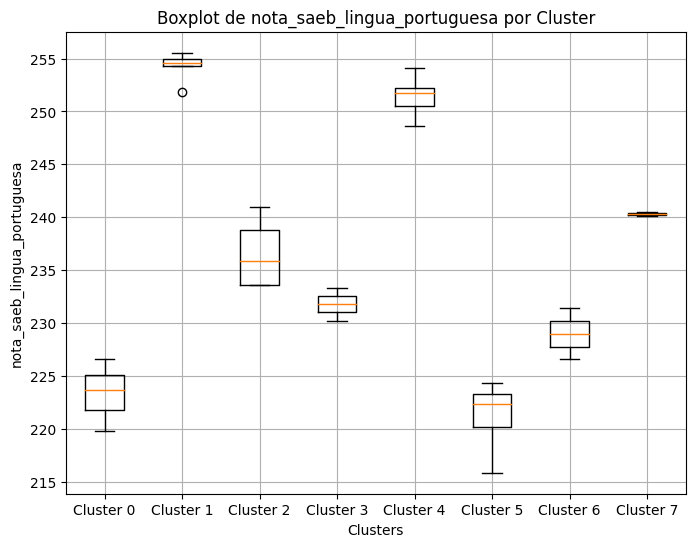

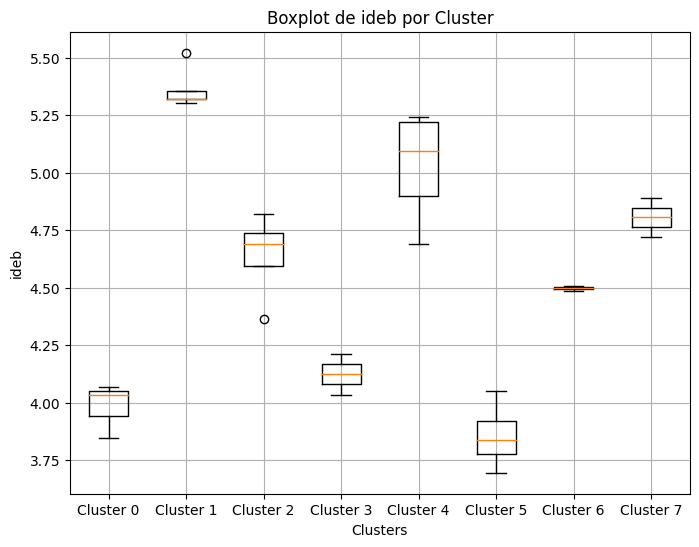

In [38]:
import matplotlib.pyplot as plt


# Criando lista das colunas que você deseja comparar
colunas_comparativas = ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']

# Plotagem dos boxplots para cada variável por cluster
for coluna in colunas_comparativas:
    plt.figure(figsize=(8, 6))
    plt.boxplot([df_agrupado[df_agrupado['Cluster'] == cluster_id][coluna] for cluster_id in range(k_escolhido)],
                labels=[f'Cluster {cluster_id}' for cluster_id in range(k_escolhido)])
    plt.title(f'Boxplot de {coluna} por Cluster')
    plt.xlabel('Clusters')
    plt.ylabel(coluna)
    plt.grid(True)
    plt.show()


In [ ]:
# seu código

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [ ]:
# Podemos afirmar, estatisticamente, se os grupos são distintos com base em algumas análises como por exemplo
# a Análise de Variância (ANOVA), com ela podemos  comparar as médias das variáveis entre os clusters e determinar se há diferenças estatisticamente significativas.


In [39]:
from scipy.stats import f_oneway

# Lista das colunas que você usou para os clusters
colunas_comparativas = ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']

# Teste ANOVA para cada coluna comparativa
for coluna in colunas_comparativas:
    data_por_cluster = [df_agrupado[df_agrupado['Cluster'] == cluster_id][coluna] for cluster_id in range(k_escolhido)]
    resultado_anova = f_oneway(*data_por_cluster)
    print(f"Resultado do teste ANOVA para '{coluna}':")
    print(f"Estatística F: {resultado_anova.statistic:.4f}")
    print(f"Valor p: {resultado_anova.pvalue:.4f}")
    if resultado_anova.pvalue < 0.05:
        print("Há evidências de diferenças estatisticamente significativas entre os grupos.")
    else:
        print("Não há evidências suficientes para afirmar diferenças estatisticamente significativas entre os grupos.")
    print("-" * 50)


Resultado do teste ANOVA para 'taxa_aprovacao':
Estatística F: 27.4465
Valor p: 0.0000
Há evidências de diferenças estatisticamente significativas entre os grupos.
--------------------------------------------------
Resultado do teste ANOVA para 'nota_saeb_matematica':
Estatística F: 57.0766
Valor p: 0.0000
Há evidências de diferenças estatisticamente significativas entre os grupos.
--------------------------------------------------
Resultado do teste ANOVA para 'nota_saeb_lingua_portuguesa':
Estatística F: 79.4677
Valor p: 0.0000
Há evidências de diferenças estatisticamente significativas entre os grupos.
--------------------------------------------------
Resultado do teste ANOVA para 'ideb':
Estatística F: 42.7069
Valor p: 0.0000
Há evidências de diferenças estatisticamente significativas entre os grupos.
--------------------------------------------------


### Atividade 11: Faça a clusterização com outro valor para k.

In [42]:
from sklearn.cluster import KMeans

# Segundo o gráfico de silhueta, o número de k é 8
k_escolhido = 3

# Inicializando o K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=k_escolhido, random_state=42)

# Executando o algoritmo K-means nos dados padronizados
kmeans.fit(dados_padronizados_df)

# Adicionando as informações de cluster de volta aos dados originais
df_agrupado['Cluster'] = kmeans.labels_

# Mostrar informações sobre os clusters
df_agrupado


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,Cluster,PCA1,PCA2
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739,2,-0.691216,0.143019
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295,2,8.522098,-4.858692
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397,1,27.874691,-2.537391
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444,1,35.650560,1.671160
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125,1,13.639073,3.613183
5,CE,2019.0,94.930585,259.397187,254.290339,5.318929,0,-22.839484,-2.586691
6,DF,2019.0,89.700000,256.365000,252.218333,4.900000,0,-18.417475,2.043217
7,ES,2019.0,91.419721,265.574820,255.552122,5.305036,0,-27.666037,1.467260
8,GO,2019.0,95.783982,257.356514,251.849397,5.357471,0,-19.864557,-3.956013
9,MA,2019.0,90.548944,225.296995,223.669534,4.067158,1,23.130815,-5.400123


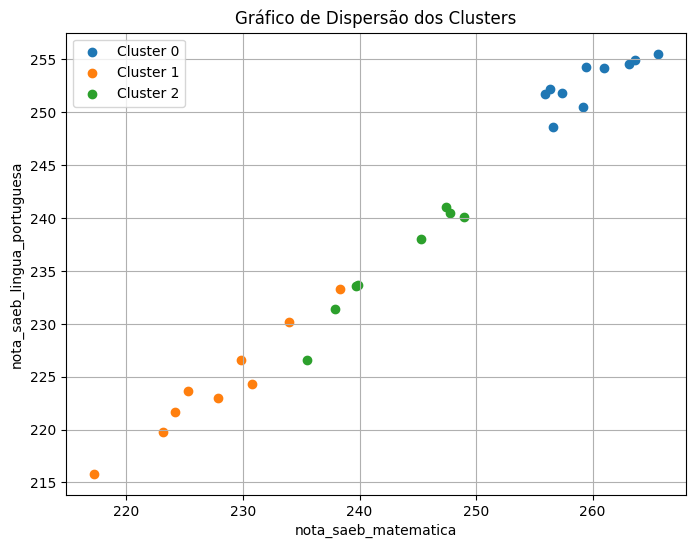

In [43]:
import matplotlib.pyplot as plt

# Escolhendo das colunas para o gráfico de dispersão (aqui pode ser qualquer uma que faça sentido)
coluna_x = 'nota_saeb_matematica'
coluna_y = 'nota_saeb_lingua_portuguesa'

# Plotagem dos clusters
plt.figure(figsize=(8, 6))

# Loop para cada cluster
for cluster_id in range(k_escolhido):  # k_escolhido é o número de clusters
    cluster = df_agrupado[df_agrupado['Cluster'] == cluster_id]
    plt.scatter(cluster[coluna_x], cluster[coluna_y], label=f'Cluster {cluster_id}')

# Adicionando legendas e rótulos
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.title('Gráfico de Dispersão dos Clusters')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
# Mostrando os estados em cada cluster
for cluster_id in range(k_escolhido):  # k_escolhido é o número de clusters
    estados_cluster = df_agrupado[df_agrupado['Cluster'] == cluster_id]['sigla_uf'].tolist()
    print(f"Cluster {cluster_id}: {estados_cluster}")


Cluster 0: ['CE', 'DF', 'ES', 'GO', 'MG', 'PR', 'RJ', 'RS', 'SC', 'SP']
Cluster 1: ['AM', 'AP', 'BA', 'MA', 'PA', 'PB', 'RN', 'RR', 'SE']
Cluster 2: ['AC', 'AL', 'MS', 'MT', 'PE', 'PI', 'RO', 'TO']


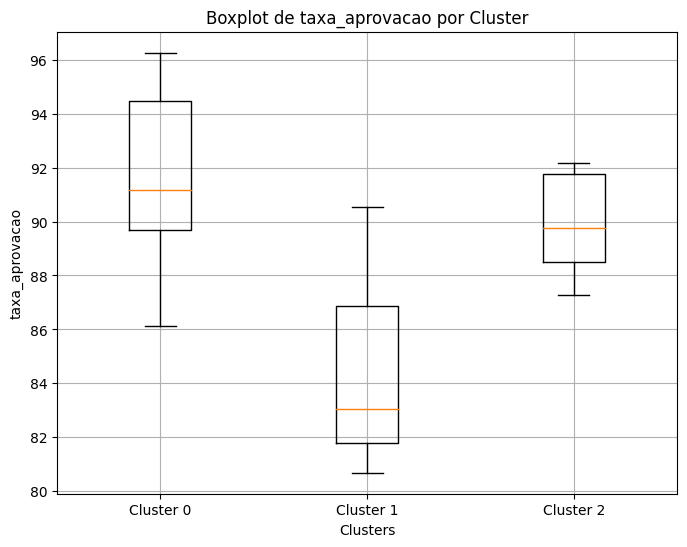

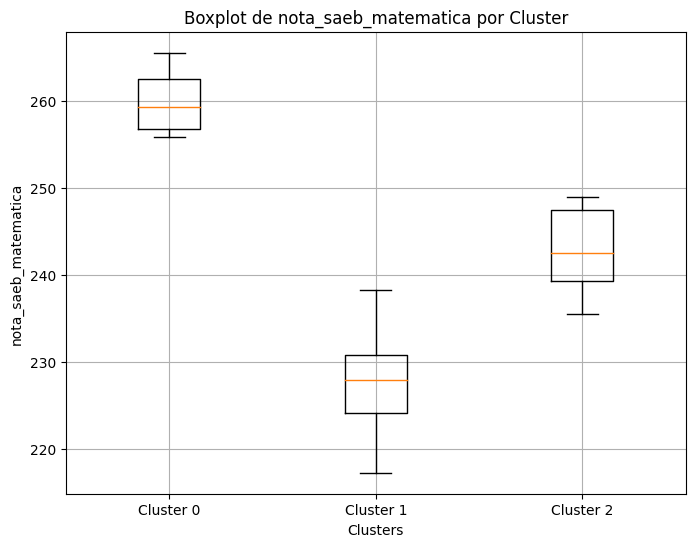

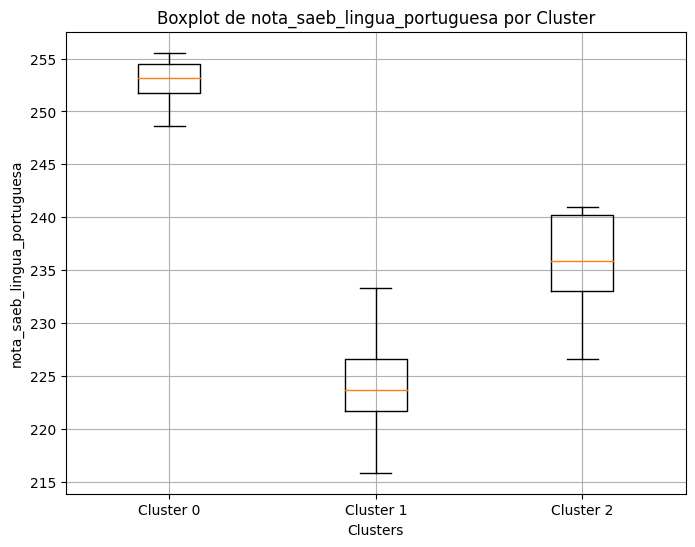

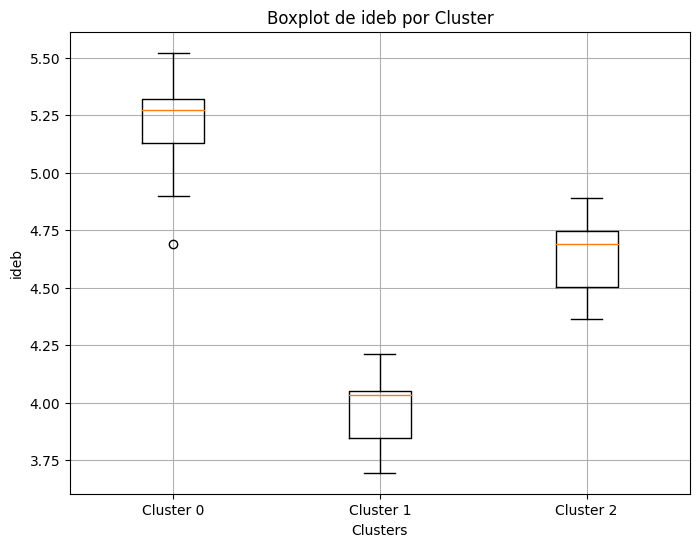

In [45]:
import matplotlib.pyplot as plt


# Lista das colunas que você deseja comparar
colunas_comparativas = ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']

# Plotagem dos boxplots para cada variável por cluster
for coluna in colunas_comparativas:
    plt.figure(figsize=(8, 6))
    plt.boxplot([df_agrupado[df_agrupado['Cluster'] == cluster_id][coluna] for cluster_id in range(k_escolhido)],
                labels=[f'Cluster {cluster_id}' for cluster_id in range(k_escolhido)])
    plt.title(f'Boxplot de {coluna} por Cluster')
    plt.xlabel('Clusters')
    plt.ylabel(coluna)
    plt.grid(True)
    plt.show()


In [46]:
from scipy.stats import f_oneway

# Lista das colunas que você usou para os clusters
colunas_comparativas = ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']

# Teste ANOVA para cada coluna comparativa
for coluna in colunas_comparativas:
    data_por_cluster = [df_agrupado[df_agrupado['Cluster'] == cluster_id][coluna] for cluster_id in range(k_escolhido)]
    resultado_anova = f_oneway(*data_por_cluster)
    print(f"Resultado do teste ANOVA para '{coluna}':")
    print(f"Estatística F: {resultado_anova.statistic:.4f}")
    print(f"Valor p: {resultado_anova.pvalue:.4f}")
    if resultado_anova.pvalue < 0.05:
        print("Há evidências de diferenças estatisticamente significativas entre os grupos.")
    else:
        print("Não há evidências suficientes para afirmar diferenças estatisticamente significativas entre os grupos.")
    print("-" * 50)


Resultado do teste ANOVA para 'taxa_aprovacao':
Estatística F: 15.3363
Valor p: 0.0001
Há evidências de diferenças estatisticamente significativas entre os grupos.
--------------------------------------------------
Resultado do teste ANOVA para 'nota_saeb_matematica':
Estatística F: 96.5531
Valor p: 0.0000
Há evidências de diferenças estatisticamente significativas entre os grupos.
--------------------------------------------------
Resultado do teste ANOVA para 'nota_saeb_lingua_portuguesa':
Estatística F: 104.4675
Valor p: 0.0000
Há evidências de diferenças estatisticamente significativas entre os grupos.
--------------------------------------------------
Resultado do teste ANOVA para 'ideb':
Estatística F: 90.4573
Valor p: 0.0000
Há evidências de diferenças estatisticamente significativas entre os grupos.
--------------------------------------------------


In [ ]:
# seu código

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: Mesmo utilizando a Análise de ANOVA e provando que há evidências de diferenças estatisticamente significativas para ambas as análises (com 8 ou com 3 clusters), eu acredito que a análise com 8 clusters seja mais precisa pois preserva melhor as médias em determinados estados e garante um retrato mais próximo da realidade.

### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

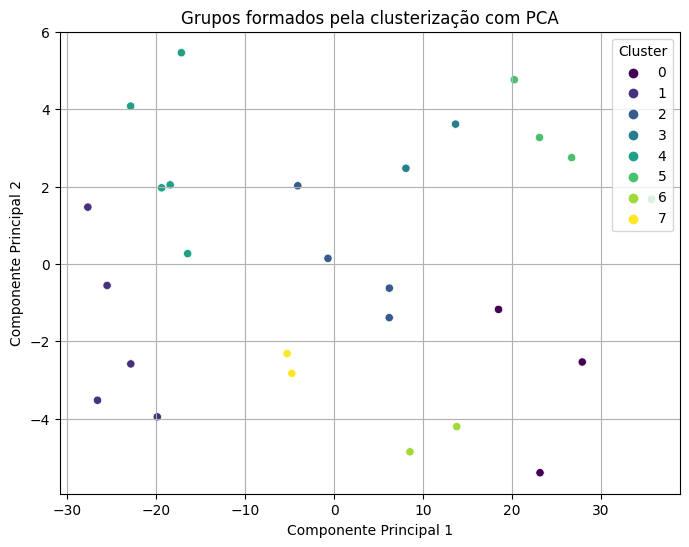

In [40]:
#Fazendo a Análise com K = 8
from sklearn.decomposition import PCA
import seaborn as sns

# Selecionando as variáveis para a clusterização
dados_clusterizacao = df_agrupado[colunas_comparativas]

# PESQUISA REALIZADA
# Uma técnica comum de redução de dimensionalidade é o PCA (Análise de Componentes Principais),
# que é usada para transformar um conjunto de variáveis correlacionadas em um conjunto de variáveis não correlacionadas (chamadas de componentes principais) mantendo o máximo de informação possível.


# Inicializando os PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais para visualização
dados_pca = pca.fit_transform(dados_clusterizacao)

# Adicionando os componentes principais ao DataFrame
df_agrupado['PCA1'] = dados_pca[:, 0]
df_agrupado['PCA2'] = dados_pca[:, 1]

# Visualização dos grupos com PCA em um gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_agrupado, palette='viridis', legend='full')
plt.title('Grupos formados pela clusterização com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


In [41]:
import numpy as np

# Inicialização e ajuste do PCA
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_clusterizacao)

# Obtendo os loadings dos componentes principais
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Criando um DataFrame para exibir os loadings de cada variável nos componentes principais
loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2'], index=colunas_comparativas)

# Exibindo os loadings das variáveis nos dois primeiros componentes principais
print("Loadings das variáveis nos Componentes Principais:")
print(loadings_df)


Loadings das variáveis nos Componentes Principais:
                                  PCA1      PCA2
taxa_aprovacao               -3.069257 -3.067863
nota_saeb_matematica        -14.477230  0.198419
nota_saeb_lingua_portuguesa -12.971889  0.508970
ideb                         -0.538972 -0.109094


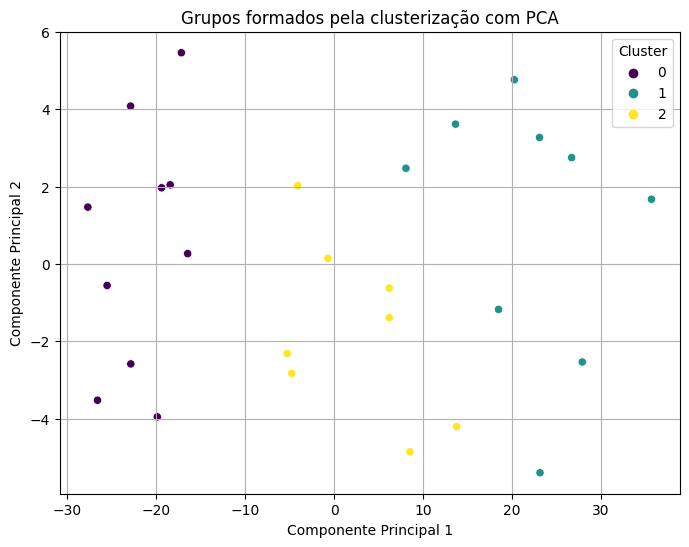

In [47]:
#Fazendo a Análise com K = 3
from sklearn.decomposition import PCA
import seaborn as sns

# Selecionando as variáveis para a clusterização
dados_clusterizacao = df_agrupado[colunas_comparativas]

# PESQUISA REALIZADA
# Uma técnica comum de redução de dimensionalidade é o PCA (Análise de Componentes Principais),
# que é usada para transformar um conjunto de variáveis correlacionadas em um conjunto de variáveis não correlacionadas (chamadas de componentes principais) mantendo o máximo de informação possível.


# Inicializando os PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais para visualização
dados_pca = pca.fit_transform(dados_clusterizacao)

# Adicionando os componentes principais ao DataFrame
df_agrupado['PCA1'] = dados_pca[:, 0]
df_agrupado['PCA2'] = dados_pca[:, 1]

# Visualização dos grupos com PCA em um gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_agrupado, palette='viridis', legend='full')
plt.title('Grupos formados pela clusterização com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


In [48]:
import numpy as np

# Inicialização e ajuste do PCA
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_clusterizacao)

# Obtendo os loadings dos componentes principais
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Criando um DataFrame para exibir os loadings de cada variável nos componentes principais
loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2'], index=colunas_comparativas)

# Exibindo os loadings das variáveis nos dois primeiros componentes principais
print("Loadings das variáveis nos Componentes Principais:")
print(loadings_df)


Loadings das variáveis nos Componentes Principais:
                                  PCA1      PCA2
taxa_aprovacao               -3.069257 -3.067863
nota_saeb_matematica        -14.477230  0.198419
nota_saeb_lingua_portuguesa -12.971889  0.508970
ideb                         -0.538972 -0.109094
